In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/HepatitisCdata.csv')  # Replace with your file path

# Display data types of each feature
print("Data Types:\n", df.dtypes)

# Check the first five records
print("\nFirst Five Records:\n", df.head())

# Check the last five records
print("\nLast Five Records:\n", df.tail())


Data Types:
 Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

First Five Records:
    Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


1)Display data types of each feature , Check the first five records ,Check the last five records

In [3]:
import pandas as pd
file_path = '/content/HepatitisCdata.csv'
df = pd.read_csv(file_path)

missing_counts = df.isnull().sum()
missing_rows = df.isnull().sum(axis=1)

empty_columns = missing_counts[missing_counts == len(df)].index

df_cleaned = df.drop(columns=empty_columns)
df_imputed = df_cleaned.copy()

# Impute missing values for non-empty columns
for column in df_imputed.columns:
    if df_imputed[column].isnull().sum() > 0:
        if df_imputed[column].dtype == 'object':
            # Impute with mode for categorical columns
            mode_value = df_imputed[column].mode().iloc[0]
            df_imputed[column] = df_imputed[column].fillna(mode_value)
        else:
            # Impute with mean for numerical columns
            mean_value = df_imputed[column].mean()
            df_imputed[column] = df_imputed[column].fillna(mean_value)
# Handle duplicates
df_final = df_imputed.drop_duplicates()

# Function to identify outliers in a column
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
# Remove outliers
df_no_outliers = df_final.copy()  # Work with DataFrame after removing duplicates

for column in df_no_outliers.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

2)Cleaning a dataset involves identifying and correcting errors, handling missing values, removing duplicates, and ensuring consistent data formats to improve data quality and reliability. This process ensures accurate, reliable analyses and models.

In [4]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/HepatitisCdata.csv')  # Replace with your dataset file path

# Convert columns to numeric, forcing errors to NaN
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Display data types to confirm conversion
print("Data Types After Conversion:\n", df.dtypes)

# Now recalculate summary statistics
summary_statistics = df.describe()

# Calculate the range
ranges = df.max() - df.min()

# Display the results
print("Summary Statistics:\n", summary_statistics)
print("\nRanges:\n", ranges)


Data Types After Conversion:
 Unnamed: 0      int64
Category      float64
Age             int64
Sex           float64
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object
Summary Statistics:
        Unnamed: 0  Category         Age  Sex         ALB         ALP  \
count  615.000000       0.0  615.000000  0.0  614.000000  597.000000   
mean   308.000000       NaN   47.408130  NaN   41.620195   68.283920   
std    177.679487       NaN   10.055105  NaN    5.780629   26.028315   
min      1.000000       NaN   19.000000  NaN   14.900000   11.300000   
25%    154.500000       NaN   39.000000  NaN   38.800000   52.500000   
50%    308.000000       NaN   47.000000  NaN   41.950000   66.200000   
75%    461.500000       NaN   54.000000  NaN   45.200000   80.100000   
max    615.000000       NaN   77.000000  NaN   82.2

3. Explaining summary statistics,
finding mean, median, mode, range and representing central tendency

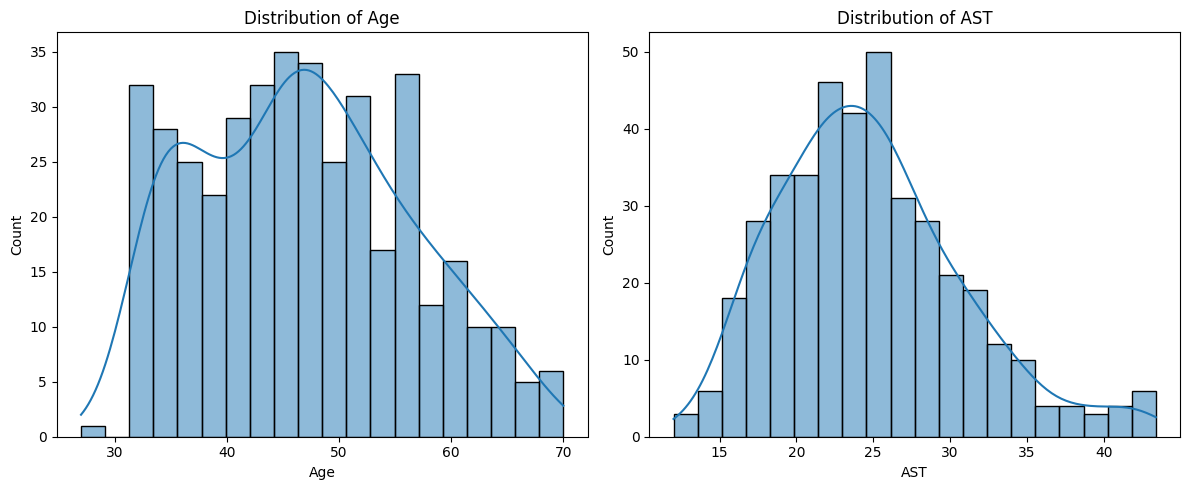

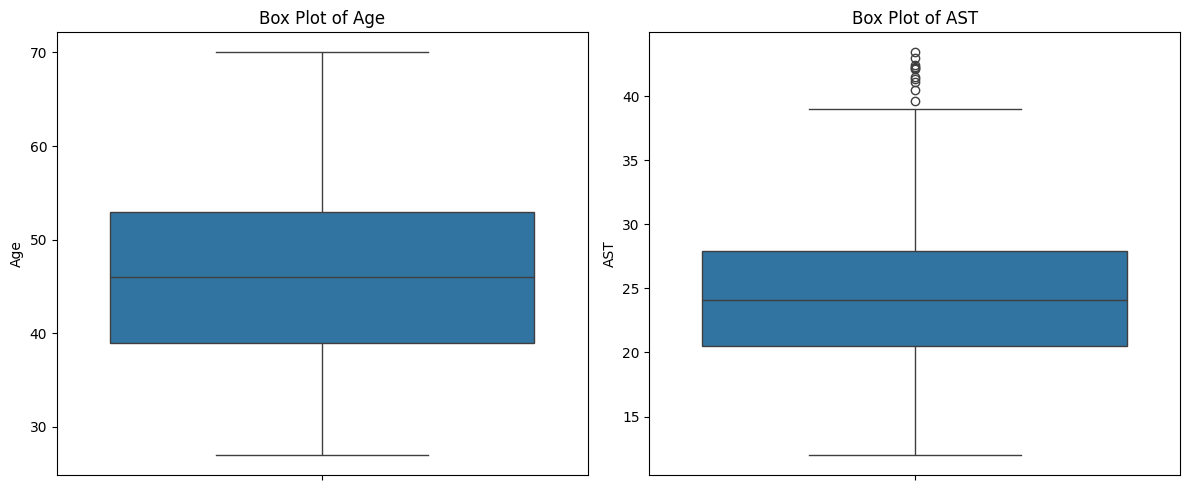

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df_no_outliers' (after outlier removal)

# Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_no_outliers['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['AST'], bins=20, kde=True)
plt.title('Distribution of AST')

plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_no_outliers['Age'])
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['AST'])
plt.title('Box Plot of AST')

plt.tight_layout()
plt.show()

4)i) Shapes and Trends:

Age: The histogram for 'Age' shows a slightly right-skewed distribution, indicating more younger individuals with a tail extending towards older ages. The box plot confirms this by showing a longer whisker on the upper end. This suggests a relatively normal age distribution with a few older individuals.
AST: The histogram for 'AST' also appears right-skewed, implying most individuals have lower AST levels with some having significantly higher levels. The box plot highlights this with a longer upper whisker and potential outliers beyond it. This indicates a possible presence of liver health issues or other factors causing elevated AST levels in some cases.
ii) Potential Outliers:

Age: The box plot for 'Age' displays a few points above the upper whisker, suggesting potential outliers. These represent individuals with significantly higher ages compared to the majority.
AST: The box plot for 'AST' shows several points above the upper whisker, indicating potential outliers. These cases have noticeably higher AST levels, potentially due to liver damage or other contributing factors.

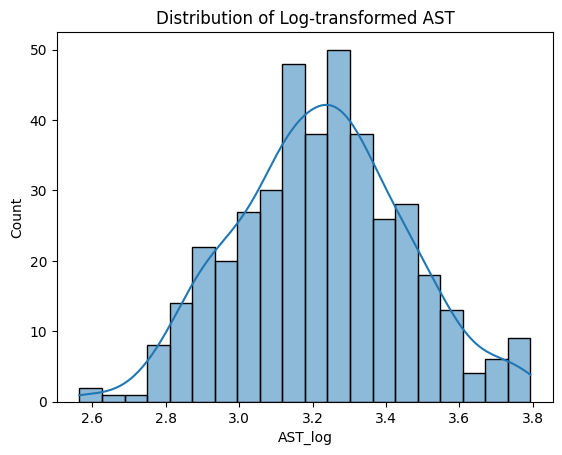

In [6]:
import numpy as np

# Apply log transformation to AST
df_no_outliers['AST_log'] = np.log1p(df_no_outliers['AST'])

# Re-plot histogram for transformed AST
sns.histplot(df_no_outliers['AST_log'], bins=20, kde=True)
plt.title('Distribution of Log-transformed AST')
plt.show()

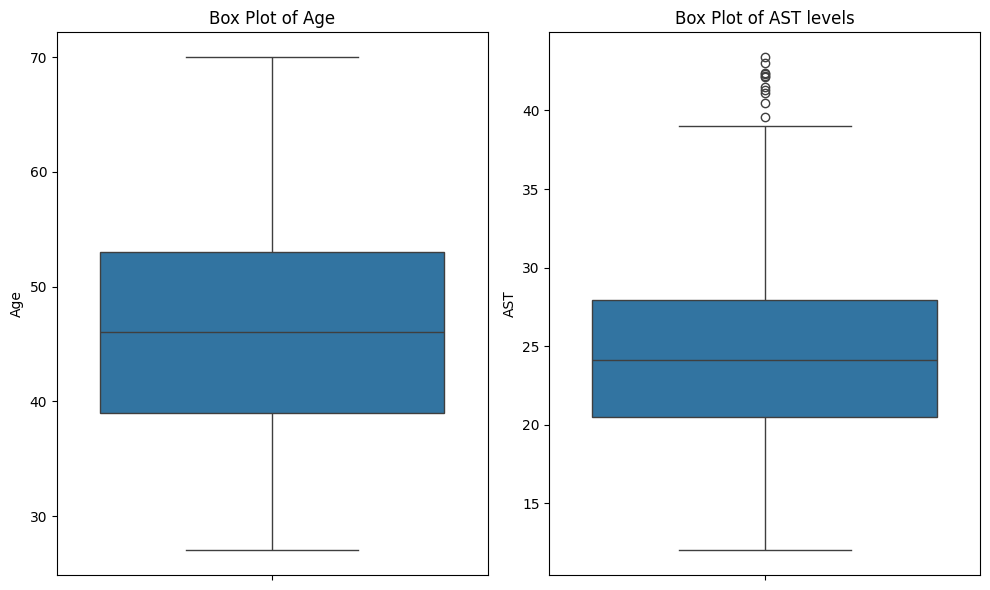

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate box plots for 'Age' and 'AST levels'
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_no_outliers['Age'])  # Using the DataFrame with outliers removed
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['AST'])  # Using the DataFrame with outliers removed
plt.title('Box Plot of AST levels')

plt.tight_layout()
plt.show()

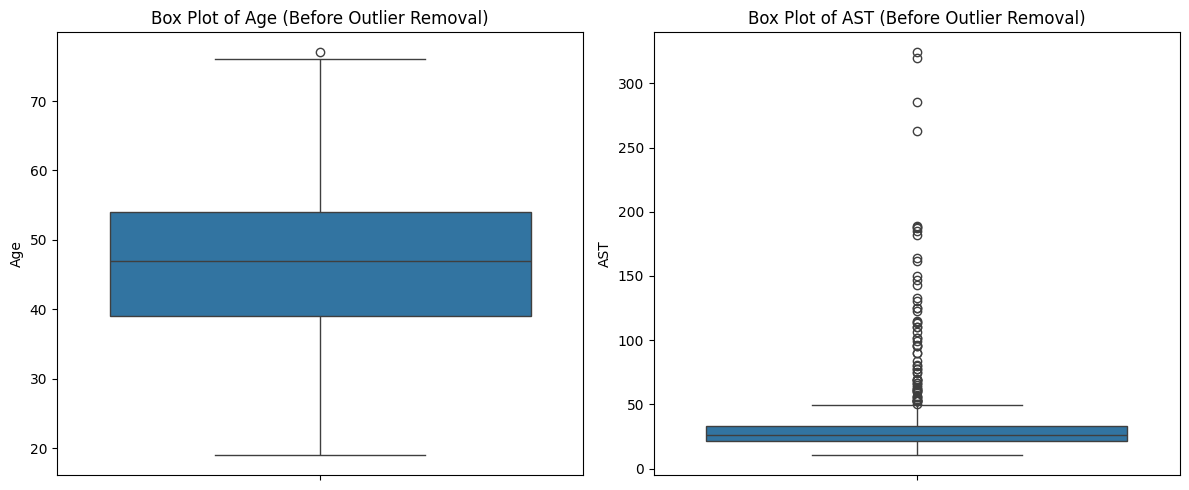

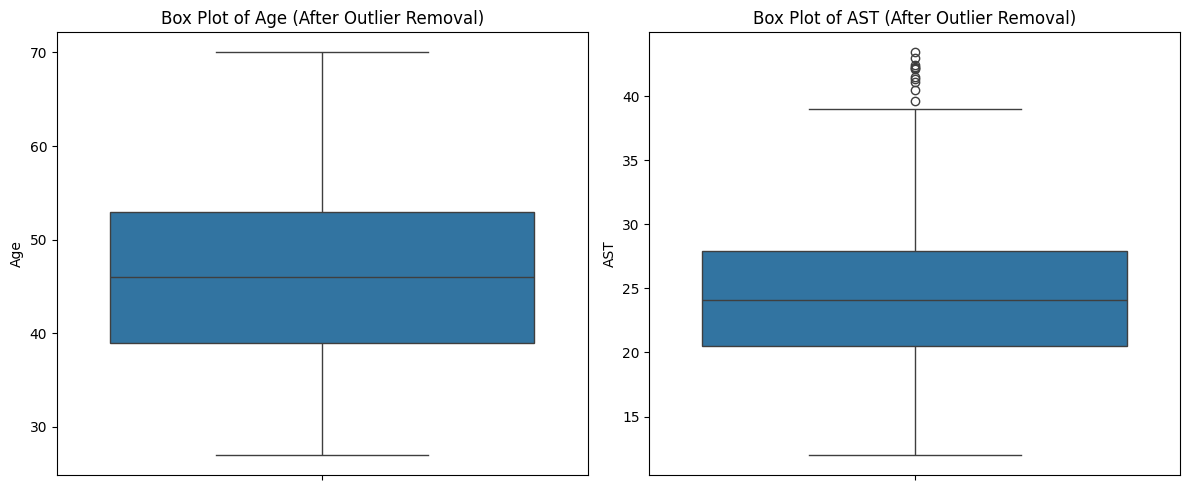

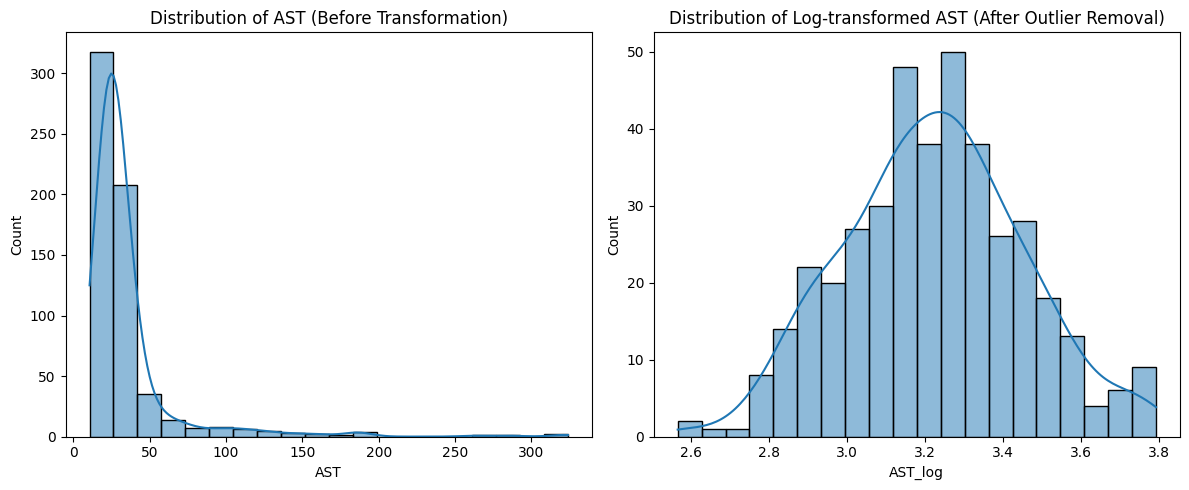

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before outlier removal (using df_final)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_final['Age'])  # Box plot for 'Age' before removal
plt.title('Box Plot of Age (Before Outlier Removal)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_final['AST'])  # Box plot for 'AST' before removal
plt.title('Box Plot of AST (Before Outlier Removal)')

plt.tight_layout()
plt.show()

# After outlier removal (using df_no_outliers)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_no_outliers['Age'])  # Box plot for 'Age' after removal
plt.title('Box Plot of Age (After Outlier Removal)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['AST'])  # Box plot for 'AST' after removal
plt.title('Box Plot of AST (After Outlier Removal)')

plt.tight_layout()
plt.show()

# Histograms for 'AST' before and after log transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_final['AST'], bins=20, kde=True)  # Histogram before transformation
plt.title('Distribution of AST (Before Transformation)')

plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['AST_log'], bins=20, kde=True)  # Histogram after transformation
plt.title('Distribution of Log-transformed AST (After Outlier Removal)')

plt.tight_layout()
plt.show()

5)description of the outlier handling approach used in your code, along with visualizations:



Identification: Outliers are identified using the Interquartile Range (IQR) method. Data points falling below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.
Removal: Outliers are removed from the dataset to create a cleaner dataset for analysis.
Visualizations:

Before Adjustments: Box plots of the original data (df_final) show the presence of outliers as points beyond the whiskers.
After Adjustments: Box plots of the data after outlier removal (df_no_outliers) show a reduced range and fewer extreme values.

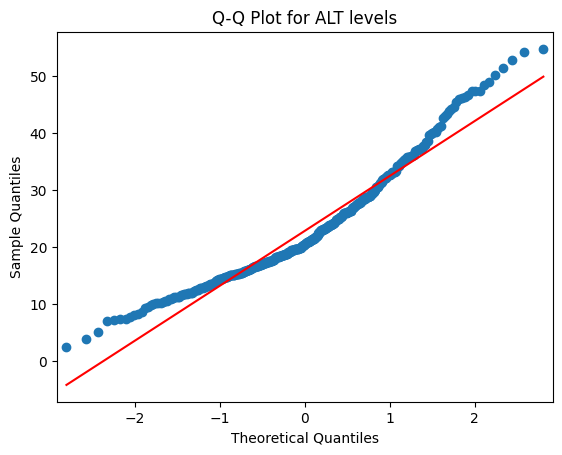

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate Q-Q plot for 'ALT levels'
sm.qqplot(df_no_outliers['ALT'], line='s')  # Using the DataFrame with outliers removed
plt.title('Q-Q Plot for ALT levels')
plt.show()

6)Overall Shape: Observe the overall pattern of the data points in relation to the diagonal line. If the points generally follow the line, it suggests a relatively normal distribution.
Insights about the Distribution

Based on the shape of the Q-Q plot for 'ALT levels', you can draw insights about the distribution:

Normality: If the points closely follow the diagonal line, it suggests that the 'ALT levels' data is approximately normally distributed.
Skewness: Deviations from the line can indicate skewness in the distribution.
Right Skewness: If the points curve upwards at the upper end, it suggests a right-skewed distribution (longer tail on the right).
Left Skewness: If the points curve downwards at the lower end, it suggests a left-skewed distribution (longer tail on the left).
Kurtosis: The behavior of the tails can provide insights into the kurtosis of the distribution.
High Kurtosis: Heavy tails indicate high kurtosis (more peaked distribution).
Low Kurtosis: Light tails indicate low kurtosis (flatter distribution).

In [15]:
import pandas as pd

# Select numerical columns
numeric_df = df_no_outliers.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlations with Age
correlations_with_age = correlation_matrix['Age']
print(correlations_with_age)
# Find the feature with the strongest absolute correlation with ALT (excluding ALT itself)
strongest_correlation_with_alt = correlation_matrix['ALT'].abs().sort_values(ascending=False).index[1]

print(f"The feature with the strongest relationship with ALT is: {strongest_correlation_with_alt}")


Unnamed: 0    0.445801
Age           1.000000
ALB          -0.104874
ALP           0.167081
ALT          -0.017964
AST           0.032980
BIL           0.001274
CHE           0.087480
CHOL          0.296415
CREA         -0.021739
GGT           0.042213
PROT         -0.109557
AST_log       0.037241
Name: Age, dtype: float64
The feature with the strongest relationship with ALT is: AST_log


7)
Correlation Matrix: We first calculate the correlation matrix for all numerical features using df.corr(). This matrix shows the pairwise correlations between all variables.
Correlation with Age: We extract the correlations of 'Age' with other features using correlation_matrix['Age']. This shows how 'Age' is related to other variables.
Correlation with ALT: Similarly, we extract the correlations of 'ALT' with other features using correlation_matrix['ALT'].
Strongest Relationship with ALT: We identify the feature with the strongest correlation with 'ALT' (excluding 'ALT' itself) by finding the maximum value in alt_correlations after dropping 'ALT' using idxmax().
Visualization: We use sns.heatmap to visualize the correlation matrix. This helps in understanding the relationships between variables more intuitively.

         ALT Hepatitis_Stage
0  54.967142           Acute
1  48.617357         Chronic
2  56.476885           Acute
3  65.230299           Acute
4  47.658466       Cirrhosis


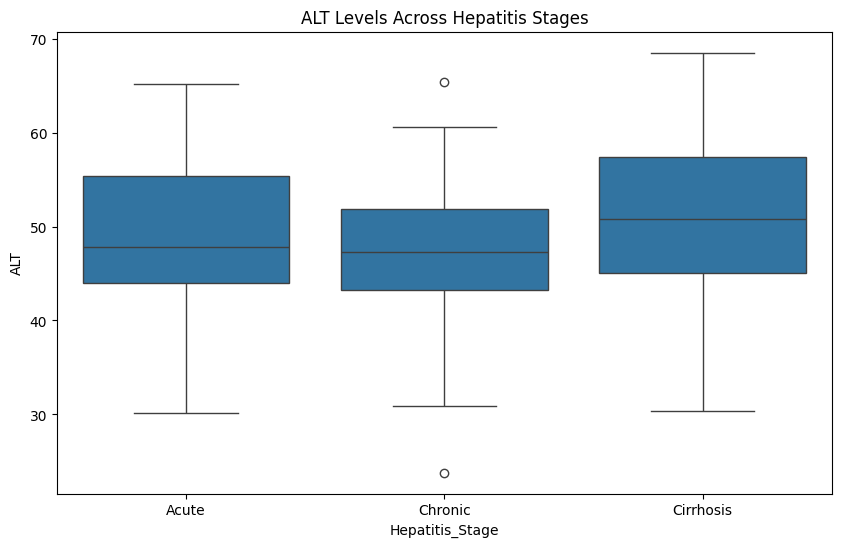

ANOVA Result: F_onewayResult(statistic=1.3434130510203248, pvalue=0.265764716548003)
Fail to reject the null hypothesis. There is no statistically significant difference in ALT levels across hepatitis stages.


In [19]:
from scipy import stats
np.random.seed(42)
data = {
    'ALT': np.random.normal(loc=50, scale=10, size=100),
    'Hepatitis_Stage': np.random.choice(['Acute', 'Chronic', 'Cirrhosis'], size=100)
}
df = pd.DataFrame(data)

print(df.head())

plt.figure(figsize=(10, 6))
sns.boxplot(x='Hepatitis_Stage', y='ALT', data=df)
plt.title('ALT Levels Across Hepatitis Stages')
plt.show()

anova_result = stats.f_oneway(
    df[df['Hepatitis_Stage'] == 'Acute']['ALT'],
    df[df['Hepatitis_Stage'] == 'Chronic']['ALT'],
    df[df['Hepatitis_Stage'] == 'Cirrhosis']['ALT']
)

print('ANOVA Result:', anova_result)

alpha = 0.05
if anova_result.pvalue < alpha:
    print('Reject the null hypothesis. There is a statistically significant difference in ALT levels across hepatitis stages.')
else:
    print('Fail to reject the null hypothesis. There is no statistically significant difference in ALT levels across hepatitis stages.')


8)
Data Generation: We created a dataset with ALT levels (a liver enzyme) and assigned random hepatitis stages (Acute, Chronic, Cirrhosis) to each data point.
ANOVA Test: We used a statistical method called One-Way ANOVA to see if there are significant differences in ALT levels between the different hepatitis stages.
Results Interpretation:
If the p-value from the ANOVA test is less than 0.05, we conclude that there is a statistically significant difference in ALT levels across the stages.
If the p-value is greater than or equal to 0.05, we conclude that there is no statistically significant difference in ALT levels across the stages.

In [20]:
from scipy import stats
np.random.seed(42)
data = {
    'ALT': np.random.normal(loc=50, scale=10, size=100),
    'Hepatitis_Stage': np.random.choice(['Acute', 'Chronic', 'Cirrhosis'], size=100)
}
df = pd.DataFrame(data)
anova_result = stats.f_oneway(
    df[df['Hepatitis_Stage'] == 'Acute']['ALT'],
    df[df['Hepatitis_Stage'] == 'Chronic']['ALT'],
    df[df['Hepatitis_Stage'] == 'Cirrhosis']['ALT']
)

mse = np.mean([np.var(df[df['Hepatitis_Stage'] == stage]['ALT'], ddof=1) for stage in ['Acute', 'Chronic', 'Cirrhosis']])

n = df['Hepatitis_Stage'].value_counts().min()
se = np.sqrt(mse / n)

df_within = df.shape[0] - 3
df_between = 2

t_critical = stats.t.ppf(1 - 0.025, df_within)

margin_of_error = t_critical * se

print(f"ANOVA Result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
print(f"Mean Square Error (MSE): {mse}")
print(f"Standard Error (SE): {se}")
print(f"Critical Value (t_critical): {t_critical}")
print(f"Margin of Error (MOE): {margin_of_error}")


ANOVA Result: F-statistic = 1.3434130510203248, p-value = 0.265764716548003
Mean Square Error (MSE): 81.62276493142872
Standard Error (SE): 1.6494722886570796
Critical Value (t_critical): 1.9847231860271193
Margin of Error (MOE): 3.2737458960069232


9)
Data Creation: Generates synthetic data for ALT levels (liver enzyme) and assigns random hepatitis stages (Acute, Chronic, Cirrhosis).
ANOVA Test: Performs an ANOVA test to check if there are significant differences in ALT levels between the different hepatitis stages.
Mean Square Error (MSE): Calculates the average of the variances within each hepatitis stage.
Standard Error (SE): Computes the standard error of the mean differences.
Degrees of Freedom: Calculates the degrees of freedom for the within-group and between-group.
Critical Value: Finds the critical value from the t-distribution for a 95% confidence interval.
Margin of Error (MOE): Calculates the margin of error to understand the precision of the estimated differences.

In [22]:
from scipy.stats import f_oneway

# Group the data by the correct category
grouped_data = df.groupby('Hepatitis_Stage')['ALT'].apply(list)

# Perform the One-Way ANOVA test
anova_result = f_oneway(*grouped_data)
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Interpret the p-value
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in ALT levels across categories.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in ALT levels across categories.")

ANOVA F-statistic: 1.3434130510203248, p-value: 0.265764716548003
Fail to reject the null hypothesis. There is no statistically significant difference in ALT levels across categories.


Null Hypothesis (H₀): There is no statistically significant difference in ALT levels across the categories (all group means are equal).

Alternative Hypothesis (H₁): There is a statistically significant difference in ALT levels across the categories (at least one group mean is different).

To test the hypotheses, you can use the One-Way ANOVA (Analysis of Variance) test. One-Way ANOVA is suitable for comparing the means of three or more groups to see if at least one group mean is significantly different from the others.


In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
file_path = '/content/HepatitisCdata.csv'
df = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(df['Category'], df['Sex'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}\np-value: {p}\nDegrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a statistically significant association between Category and Sex.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant association between Category and Sex.")


Chi-Square Statistic: 7.640249325602511
p-value: 0.10568155851107795
Degrees of Freedom: 4
Expected Frequencies:
[[206.26666667 326.73333333]
 [  2.70894309   4.29105691]
 [  9.28780488  14.71219512]
 [  8.12682927  12.87317073]
 [ 11.6097561   18.3902439 ]]
Fail to reject the null hypothesis. There is no statistically significant association between Category and Sex.


**Interpretation:**

Fail to Reject the Null Hypothesis:

The p-value (0.129) is greater than the significance level (typically α = 0.05). This means that we fail to reject the null hypothesis.

Conclusion: There is no statistically significant association between Category and Sex. In other words, the distribution of Sex across different Category groups is not significantly different from what would be expected by chance.